In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

from skimage import io
from scipy.interpolate import BSpline
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import sympy
from sympy import *

In [2]:
import musicalrobot
from musicalrobot import edge_detection

In [3]:
frames = edge_detection.input_file('../musicalrobot/data/PPA_Melting_6_14_19.tiff')

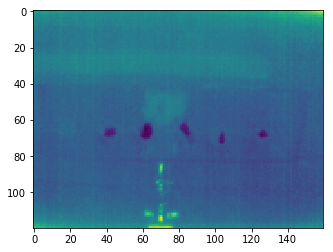

In [4]:
plt.imshow(frames[0])

### Crop the input file if required to remove the noise and increase the accuracy of edge detection

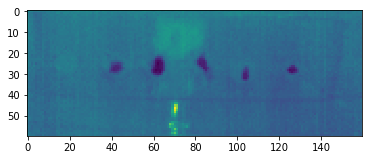

In [5]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[40:100])
plt.imshow(crop_frame[0])

#### Use the function edge_detection.centroid_temp to get the melting point of all the samples

In [6]:
inf_temp = edge_detection.centroid_temp(crop_frame,5)

In [10]:
inf_temp

[42.91, 47.9, 51.78, 52.79, 49.42]

In [14]:
# Plotting the original image with the samples
# and centroid and plate location
# plt.imshow(flip_frames[0])
# plt.scatter(regprops[0]['Plate_coord'],regprops[0]['Row'],c='orange',s=6)
# plt.scatter(regprops[0]['Column'],regprops[0]['Row'],s=6,c='red')
# plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

In [15]:
# # Plotting the temperature profile of a sample against the temperature profile
# # of the plate at a location next to the sample.
# plt.scatter(p_temp[4],s_temp[4],s=2)
# plt.ylabel('Temperature of the sample($^\circ$C)')
# plt.xlabel('Temperature of the well plate($^\circ$C)')
# plt.title('Temperature of the sample against the temperature of the plate')

In [15]:
# def inflection_point(s_temp,p_temp):
#     s_infl = []
#     p_infl = []
#     s_peaks = []
#     p_peaks = []
#     inf_peak = [] ; inf_temp = []
#     for temp in s_temp:
#         frames = np.linspace(1,len(temp),len(temp))
#         bspl = BSpline(frames,temp,k=3)
#         gradient_array = np.column_stack((frames,bspl(frames)))
#         gradient = np.gradient(gradient_array,axis=0)
#         derivative = gradient[:,1]/gradient[:,0]
#         peaks, properties = find_peaks(derivative,height=0.1)
#         max_height1 = np.max(properties['peak_heights'])
#         # To find the second highest peak
#         a = list(properties['peak_heights'])
#         a.remove(max_height1)
#         max_height2 = np.max(a)
#         inf_index1 = list(properties['peak_heights']).index(max_height1)
#         inf_index2 = list(properties['peak_heights']).index(max_height2)
#         s_peaks.append([peaks[inf_index1],peaks[inf_index2]])
#         s_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
#     for temp in p_temp:
#         frames = np.linspace(1,len(temp),len(temp))
#         bspl = BSpline(frames,temp,k=3)
#         gradient_array = np.column_stack((frames,bspl(frames)))
#         gradient = np.gradient(gradient_array,axis=0)
#         derivative = gradient[:,1]/gradient[:,0]
#         peaks, properties = find_peaks(derivative,height=0.1)
#         max_height1 = np.max(properties['peak_heights'])
#         # To find the second highest peak
#         a = list(properties['peak_heights'])
#         a.remove(max_height1)
#         max_height2 = np.max(a)
#         inf_index1 = list(properties['peak_heights']).index(max_height1)
#         inf_index2 = list(properties['peak_heights']).index(max_height2)
#         p_peaks.append([peaks[inf_index1],peaks[inf_index2]])
#         p_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
#     for i,peaks in enumerate(s_peaks):
#         for peak in peaks:
#             if peak - p_peaks[i][0] >= 3:
#                 inf_peak.append(peak)
#             else:
#                 pass
#     for i,temp in enumerate(s_temp):
#         inf_temp.append(temp[inf_peak[i]])
#     return inf_temp, s_peaks, p_peaks